<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Image%20Classification/Cifar10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Project**

In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.datasets import cifar10, cifar100
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import time

In [2]:
# 2. Load dữ liệu cifar
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


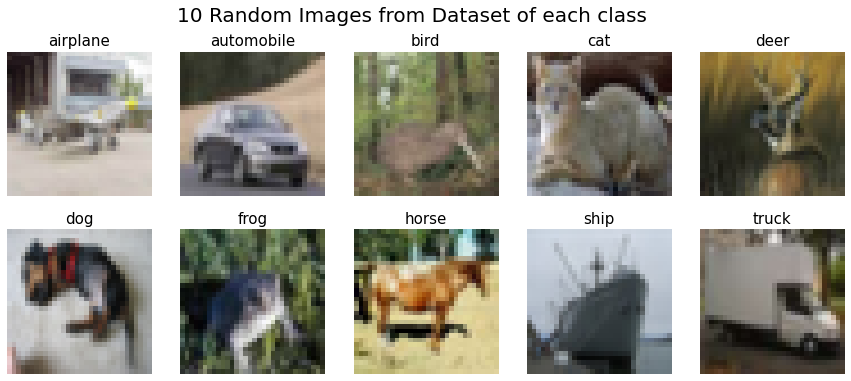

In [3]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx][0] not in d.keys():
          d[y_train[idx][0]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

In [4]:
# 4. prepare data
img_width = 32
img_height = 32
img_channel = 3

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# 5. build model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_width, img_height, img_channel)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                      

In [6]:
# 6. train model
start_time = time.time()
H = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=25, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/25
1250/1250 [==============================] - 23s 9ms/step - loss: 1.5603 - accuracy: 0.4444 - val_loss: 1.2725 - val_accuracy: 0.5458
Epoch 2/25
1250/1250 [==============================] - 13s 11ms/step - loss: 1.0960 - accuracy: 0.6103 - val_loss: 0.9057 - val_accuracy: 0.6714
Epoch 3/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9301 - accuracy: 0.6732 - val_loss: 0.8777 - val_accuracy: 0.6975
Epoch 4/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8398 - accuracy: 0.7057 - val_loss: 0.7545 - val_accuracy: 0.7361
Epoch 5/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7736 - accuracy: 0.7283 - val_loss: 0.7722 - val_accuracy: 0.7310
Epoch 6/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7289 - accuracy: 0.7440 - val_loss: 0.6262 - val_accuracy: 0.7856
Epoch 7/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6948 - accuracy: 0.7566 - val_loss: 0.8610 - val_accur

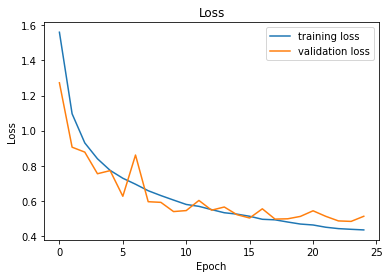

In [7]:
# 7. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 25
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

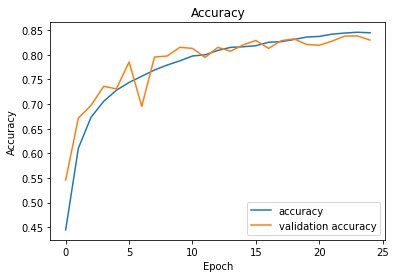

In [8]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 25
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
# 9.Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 4ms/step - loss: 0.5235 - accuracy: 0.8204
[loss, accuracy]:  [0.5234543085098267, 0.8203999996185303]
Running time: 1.47 (s)


[[8.6288387e-03 8.6937797e-01 8.5475546e-04 1.8326064e-03 5.3255394e-04
  2.6180007e-04 8.2322434e-03 4.4984580e-04 5.7521701e-02 5.2307788e-02]]
[1] 1
Giá trị dự đoán:  automobile


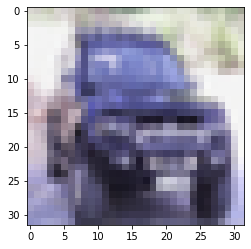

In [40]:
# 10.predict
id = 9
plt.imshow(X_test[id])

y_predict = model.predict(X_test[id].reshape(1, img_width, img_height, img_channel))
print(y_predict)
y_predict = np.argmax(y_predict)
print(y_test[id], y_predict)
print('Giá trị dự đoán: ', label[y_predict])

In [37]:
# 11. load ảnh
from google.colab import files
uploaded = files.upload()

Saving test.jpg to test.jpg


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  automobile


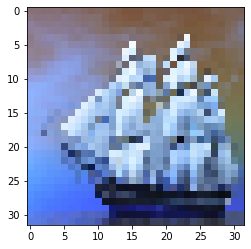

In [38]:
# 12. predict ảnh mạng
import cv2
img = cv2.imread('test.jpg')
img = cv2.resize(src=img, dsize=(img_width, img_height))
plt.imshow(img)

y_pred = model.predict(img.reshape(1, img_width, img_height, img_channel))
print(y_pred)
y_pred = np.argmax(y_pred)
print('Giá trị dự đoán: ', label[y_pred])